In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
no_inv = "data/data_500q.csv"
inv = "data/data_C_2.csv"

df_inv = pd.read_csv(inv)
df_no_inv = pd.read_csv(no_inv)

Text(0.5, 1.0, 'B & D')

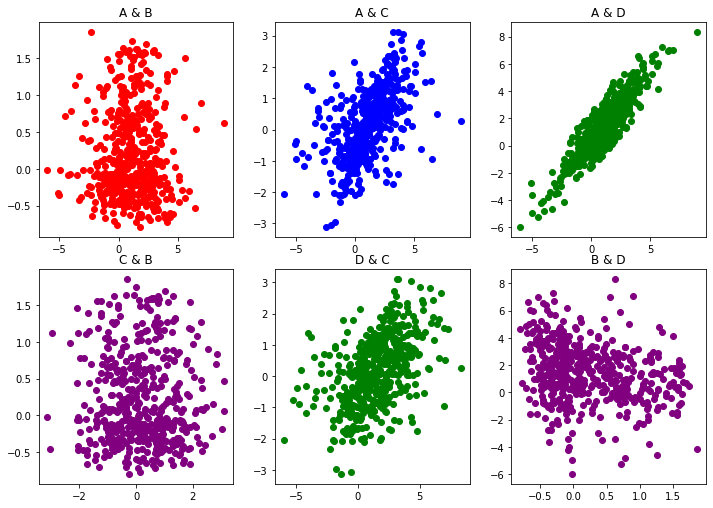

In [150]:
#define subplots
fig, ax = plt.subplots(2, 3, figsize=(10,7))
fig.tight_layout()

#create subplots
ax[0, 0].scatter(df_no_inv["A"], df_no_inv["B"], color='red')
ax[0,0].set_title('A & B')
ax[0, 1].scatter(df_no_inv["A"], df_no_inv["C"], color='blue')
ax[0,1].set_title('A & C')
ax[0, 2].scatter(df_no_inv["A"], df_no_inv["D"], color='green')
ax[0,2].set_title('A & D')
ax[1, 0].scatter(df_no_inv["C"], df_no_inv["B"], color='purple')
ax[1,0].set_title('C & B')
ax[1, 1].scatter(df_no_inv["D"], df_no_inv["C"], color='green')
ax[1,1].set_title('D & C')
ax[1, 2].scatter(df_no_inv["B"], df_no_inv["D"], color='purple')
ax[1,2].set_title('B & D')

Variance

In [151]:
A_var = np.var(df_no_inv["A"])
B_var = np.var(df_no_inv["B"])
C_var = np.var(df_no_inv["C"])
D_var = np.var(df_no_inv["D"])


A2_var = np.var(df_inv["A"])
B2_var = np.var(df_inv["B"])
C2_var = np.var(df_inv["C"])
D2_var = np.var(df_inv["D"])

print(A_var, B_var, C_var, D_var)
print(A2_var, B2_var, C2_var, D2_var)

3.870759902507188 0.37999924295245247 1.2062632400595983 4.686437152828637
2.235849222511691 0.3707142439097328 0.0 2.7470720168579503


Mean

In [152]:
A_mean = np.mean(df_no_inv["A"])
B_mean = np.mean(df_no_inv["B"])
C_mean = np.mean(df_no_inv["C"])
D_mean = np.mean(df_no_inv["D"])
A2_mean = np.mean(df_inv["A"])
B2_mean = np.mean(df_inv["B"])
C2_mean = np.mean(df_inv["C"])
D2_mean = np.mean(df_inv["D"])



print(A2_mean, B2_mean, C2_mean, D2_mean)
print(A_mean,  B_mean, C_mean, D_mean)

3.2144040623999968 0.25517330505000013 2.0 3.6192307573399995
1.0685000248319994 0.21620841755000011 0.16259399535600016 1.472291607285999


In [153]:
array = np.array([[A2_mean, B2_mean, C2_mean, D2_mean], 
                  [A_mean, B_mean, C_mean, D_mean]])
  
# creating a list of index names
index_values = ['mean_after', 'mean_before']

# creating a list of column names
column_values = ['A', 'B', 'C', 'D']

before_aftermean = pd.DataFrame(array, index_values, column_values)
before_aftermean

,A,B,C,D
mean_after,3.214404,0.255173,2.000000,3.619231
mean_before,1.068500,0.216208,0.162594,1.472292


In [154]:
array = np.array([[A2_var, B2_var, C2_var, D2_var], 
                  [A_var, B_var, C_var, D_var]])
  
# creating a list of index names
index_values = ['mean_after', 'mean_before']

# creating a list of column names
column_values = ['A', 'B', 'C', 'D']

before_aftervar = pd.DataFrame(array, index_values, column_values)
before_aftervar

,A,B,C,D
mean_after,2.235849,0.370714,0.000000,2.747072
mean_before,3.870760,0.379999,1.206263,4.686437


In [155]:
def percentage_diff(var1, var2):
    if var2 == 0:
        var2 = 1e-12
    return abs(((var2 - var1) / abs(var1)) * 100)

In [156]:
array = np.array([[percentage_diff(A_mean, A2_mean), percentage_diff(B_mean, B2_mean), percentage_diff(C_mean, C2_mean), percentage_diff(D_mean, D2_mean)],
                  [percentage_diff(A_var, A2_var), percentage_diff(B_var, B2_var), percentage_diff(C_var, C2_var), percentage_diff(D_var, D2_var)]])

# creating a list of index names
index_values = ['mea%', 'var%']

# creating a list of column names
column_values = ['A', 'B', 'C', 'D']

tab1 = pd.DataFrame(array, index_values, column_values)
tab1

,A,B,C,D
mea%,200.833317,18.021910,1130.057725,145.822957
var%,42.237460,2.443426,100.000000,41.382506


In [157]:
rs = np.random.RandomState(0)
corr = df_no_inv.corr()
corr.style.background_gradient(cmap='magma')

,Unnamed: 0,A,B,C,D
Unnamed: 0,1.000000,0.064343,-0.023427,0.033813,0.053497
A,0.064343,1.000000,0.018177,0.551803,0.903782
B,-0.023427,0.018177,1.000000,-0.025805,-0.246866
C,0.033813,0.551803,-0.025805,1.000000,0.483370
D,0.053497,0.903782,-0.246866,0.483370,1.000000


In [158]:
corr = df_inv.corr()
corr.style.background_gradient(cmap='magma')

/Users/kristofferkjaer/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/kristofferkjaer/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Unnamed: 0,A,B,C,D
Unnamed: 0,1.000000,-0.095397,0.069938,nan,-0.079778
A,-0.095397,1.000000,0.040967,nan,0.839470
B,0.069938,0.040967,1.000000,nan,-0.304069
C,nan,nan,nan,nan,nan
D,-0.079778,0.839470,-0.304069,nan,1.000000


Correlation between x and y: -0.25


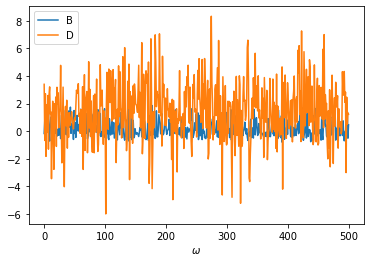

<Figure size 432x288 with 0 Axes>

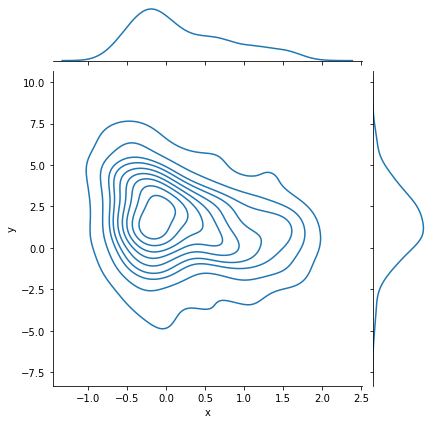

In [159]:
plt.figure();
plt.plot(df_no_inv["B"]);
plt.plot(df_no_inv["D"]);
plt.legend(('B','D'));
plt.xlabel(r'$\omega$');
print('Correlation between x and y: %.2f'%np.corrcoef(df_no_inv["B"],df_no_inv["D"])[0,1]);
plt.figure();
sns.jointplot(data={'x':df_no_inv["B"],'y':df_no_inv["D"]},x='x',y='y',kind='kde');

In [160]:
def MI(x,y,Nbins=21):
    bins = np.linspace(np.min(x),np.max(x),Nbins)
    eps=np.spacing(1)
    x_marginal = np.histogram(x,bins=bins)[0]
    x_marginal = x_marginal/x_marginal.sum()
    y_marginal = np.array(np.histogram(y,bins=bins)[0])
    y_marginal = y_marginal/y_marginal.sum()
    xy_joint = np.array(np.histogram2d(x,y,bins=(bins,bins))[0])
    xy_joint = xy_joint/xy_joint.sum()
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(xy_joint.T,origin='lower')
    plt.title('joint')
    plt.subplot(1,2,2)
    plt.imshow((x_marginal[:,None]*y_marginal[None,:]).T,origin='lower')
    plt.title('product of marginals')
    MI=np.sum(xy_joint*np.log(xy_joint/(x_marginal[:,None]*y_marginal[None,:]+eps)+eps))
    plt.suptitle('Mutual information: %f'%MI)
    return(MI)


0.785683793921168

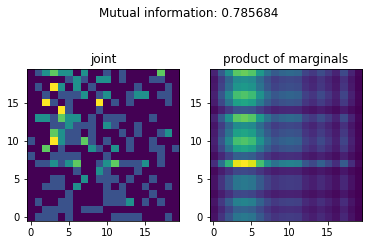

In [161]:
MI(df_no_inv["B"],df_no_inv["D"])